# LEARNED LAYER

here we bring together all the LearnedLayerAwesomeness. 
1. optimization
2. experiment runner that shows details of the run 
3. reporting results 


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=0)
from IPython.core.display import HTML
HTML('<style>.container { width:100% !important; }</style>')

# 1. Optimisation

Reading from file: PUBCHEM/AID1834_active.sdf
Reading from file: PUBCHEM/AID1834_inactive.sdf
Reading from file: PUBCHEM/AID1834_active.sdf
Reading from file: PUBCHEM/AID1834_inactive.sdf
0 of 10 experiments crashed


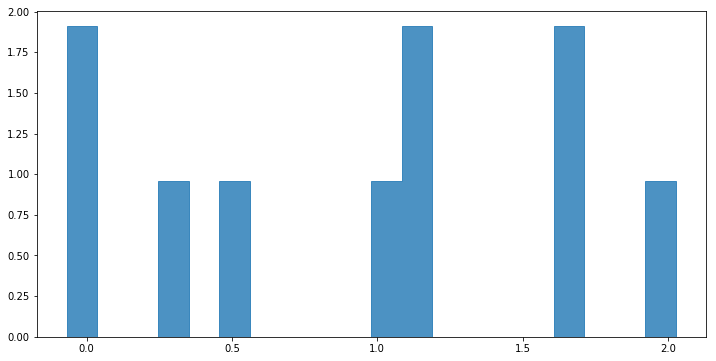

{'accept_static_penalty': [0.28165843050840644, 0.9016881809626074],
 'core_choice_byscore': [True],
 'core_choice_bytrial': [True],
 'core_choice_bytrial_multiplier': [0.5815272894648207],
 'grammar_options': {'min_cip_count': [3, 3, 2, 3, 3],
                     'min_interface_count': [3, 3, 2, 3, 3],
                     'radius_list': [[0, 1],
                                     [0],
                                     [0, 1],
                                     [0, 1, 2],
                                     [0, 1, 2, 3]],
                     'thickness_list': [[1],
                                        [1, 2, 3],
                                        [1, 2, 3],
                                        [1, 2],
                                        [1]]},
 'improving_linear_start_fraction': [0.24843748821058032, 0.21746374402332924],
 'improving_threshold_fraction': [0.730079809882828, 0.7358531219423612],
 'learn_params': {'depth': [6, 5, 6, 5, 1],
                  'gro

In [2]:
from moleLearnedLayer import optimize, util
import pprint

aid='1834'
typ=1
num_tries=10
numt=num_tries-1
size=40 
repeats=1
data = util.init_optimisation(aid=aid,size=size,repeats=repeats)


ffname='task_%s_%d_%d_%d' % (aid,size,size,repeats) 
!echo seq 0 $numt \| parallel python ../moleLearnedLayer/optimize.py $ffname $typ  | fish  
  

#optimize.run_many(data,typ=1,num_tries=20)  # alternative :) 
optimize.report(aid, typ, num_tries, top=5)



# 2.Fitting with LOTS of details

Reading from file: PUBCHEM/AID1834_active.sdf
Reading from file: PUBCHEM/AID1834_inactive.sdf
minortransform_scores


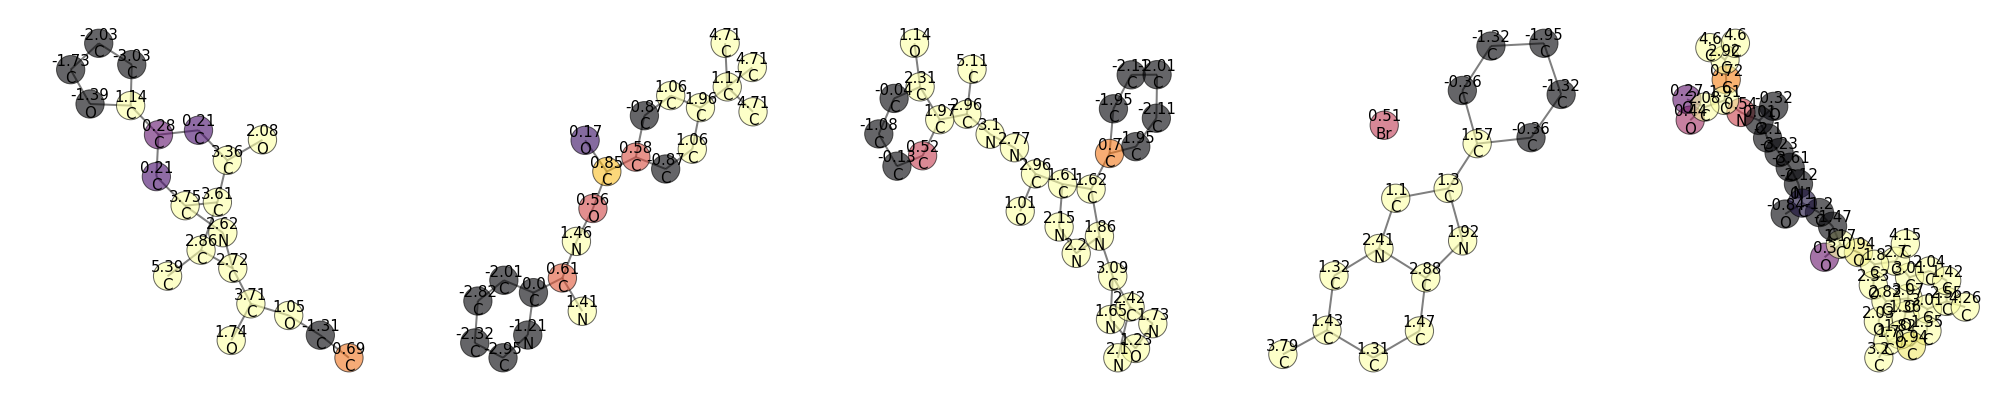

num clusters: 2
class: 0 count:2 (0.03)
class: 1 count:28 (0.44)
class: 2 count:2 (0.03)
class: -1 count:31 (0.49)

cluster: 0  len 2


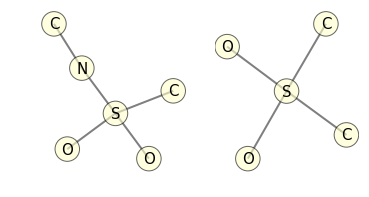

cluster: 1  len 28


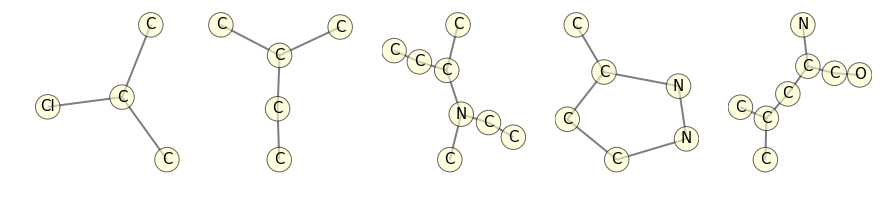

cluster: 2  len 2


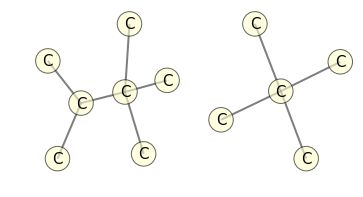

cluster: -1  len 31


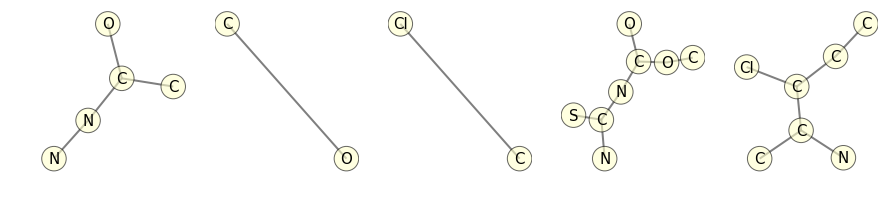

minortransform_added_layer


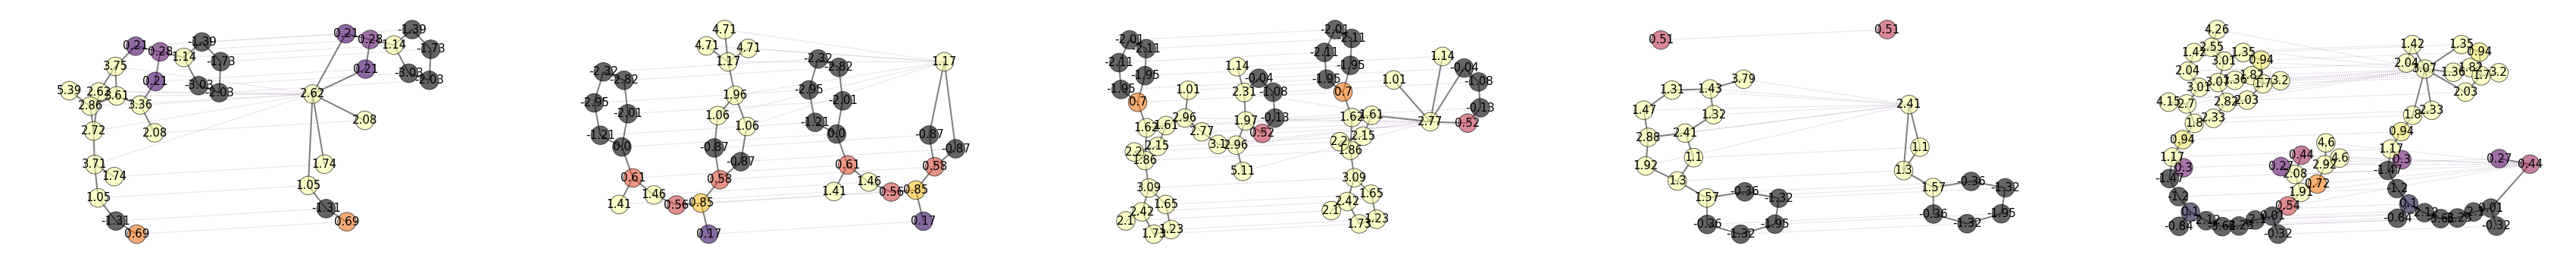

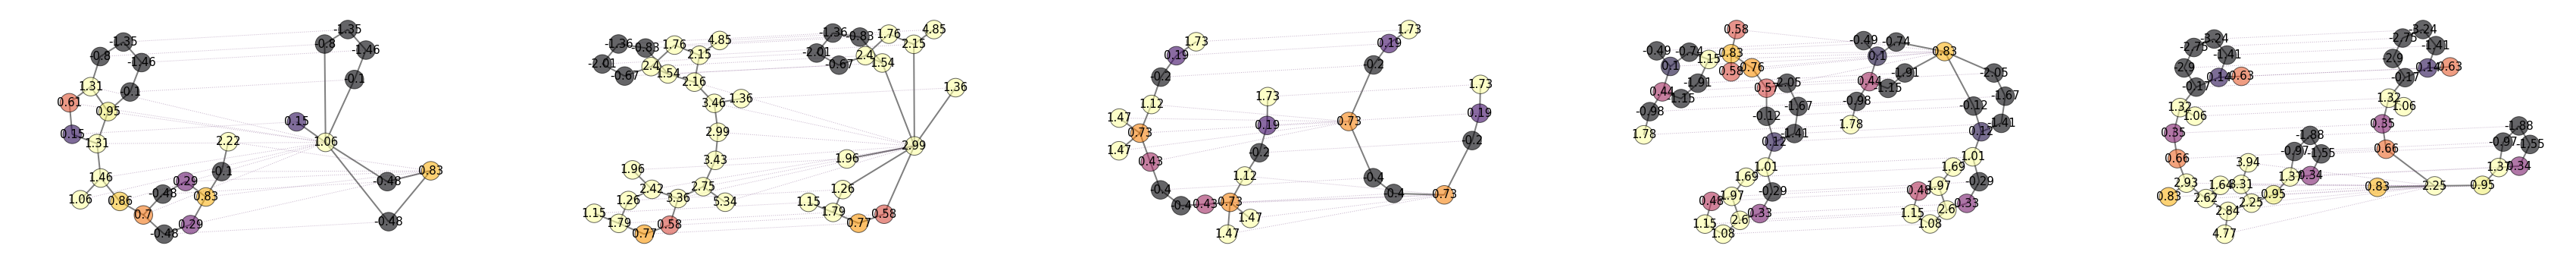

minortransform_scores


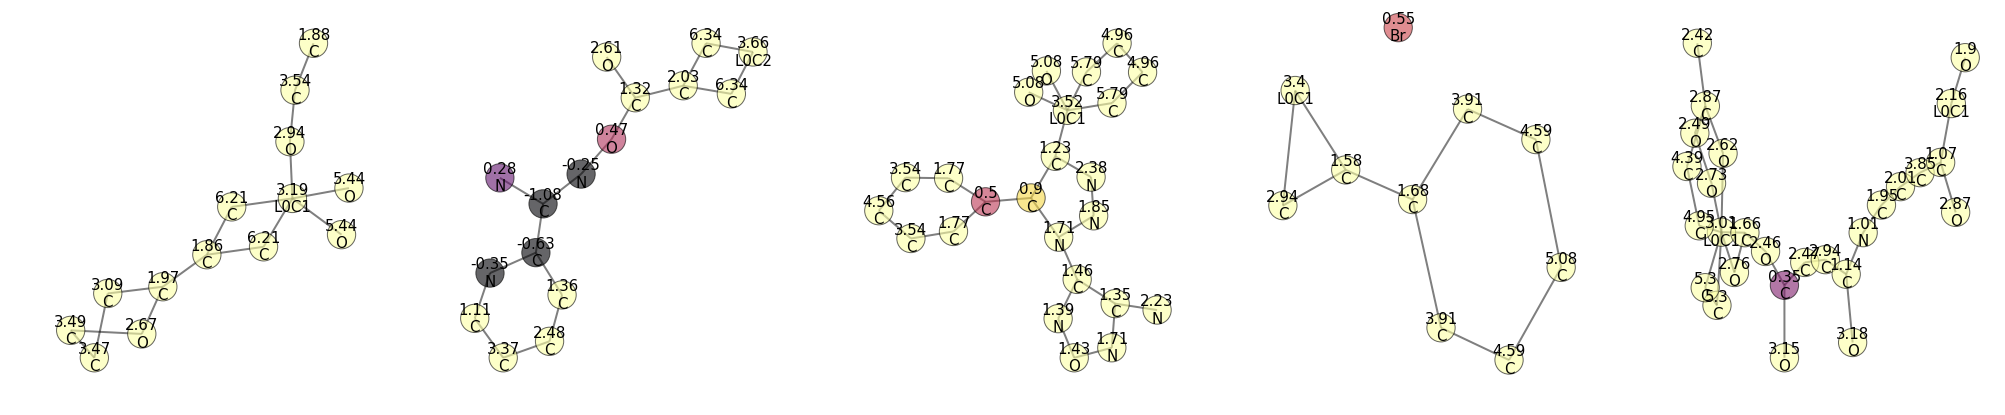

num clusters: 5
class: 0 count:4 (0.05)
class: 1 count:23 (0.31)
class: 2 count:2 (0.03)
class: 3 count:3 (0.04)
class: 4 count:2 (0.03)
class: 5 count:2 (0.03)
class: -1 count:38 (0.51)

cluster: 0  len 4


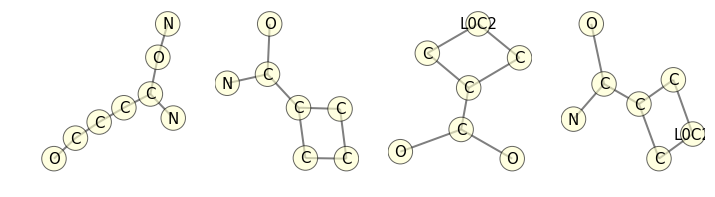

cluster: 1  len 23


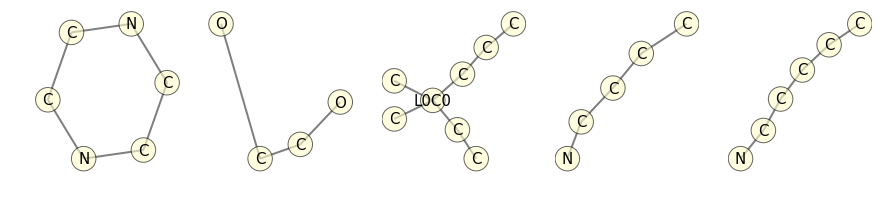

cluster: 2  len 2


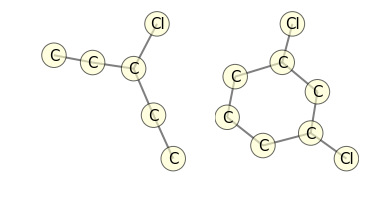

cluster: 3  len 3


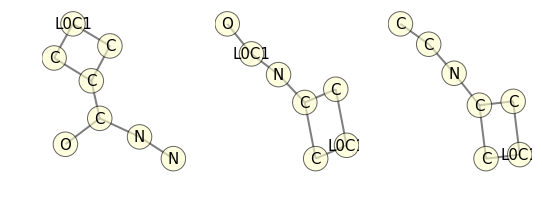

cluster: 4  len 2


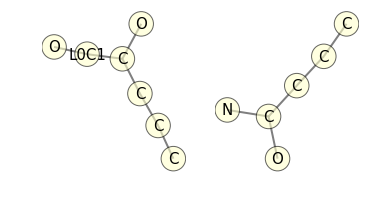

cluster: 5  len 2


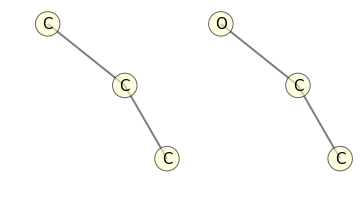

cluster: -1  len 38


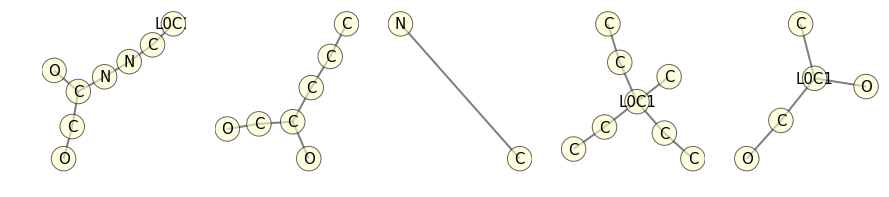

minortransform_added_layer


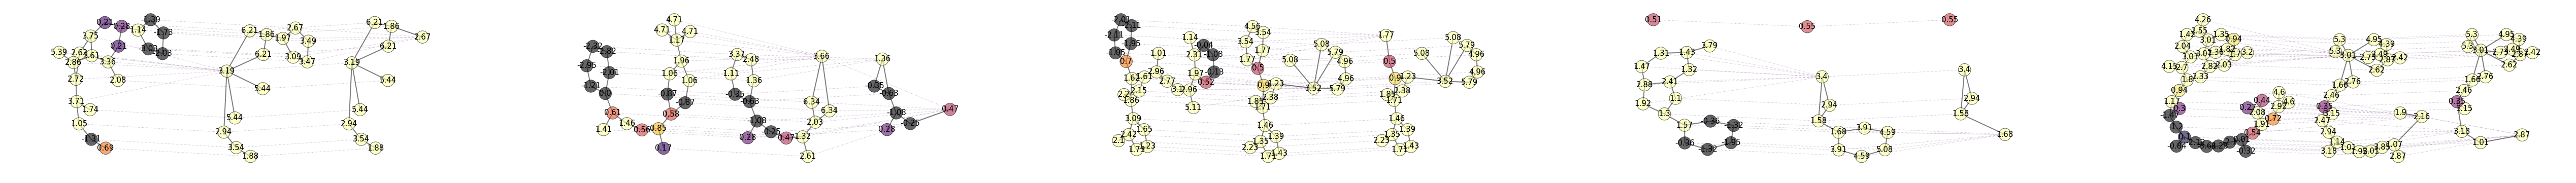

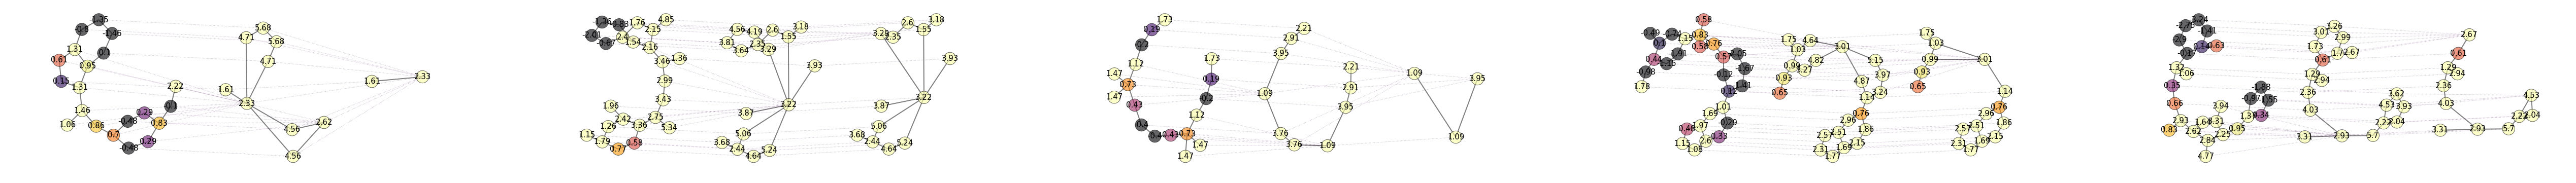

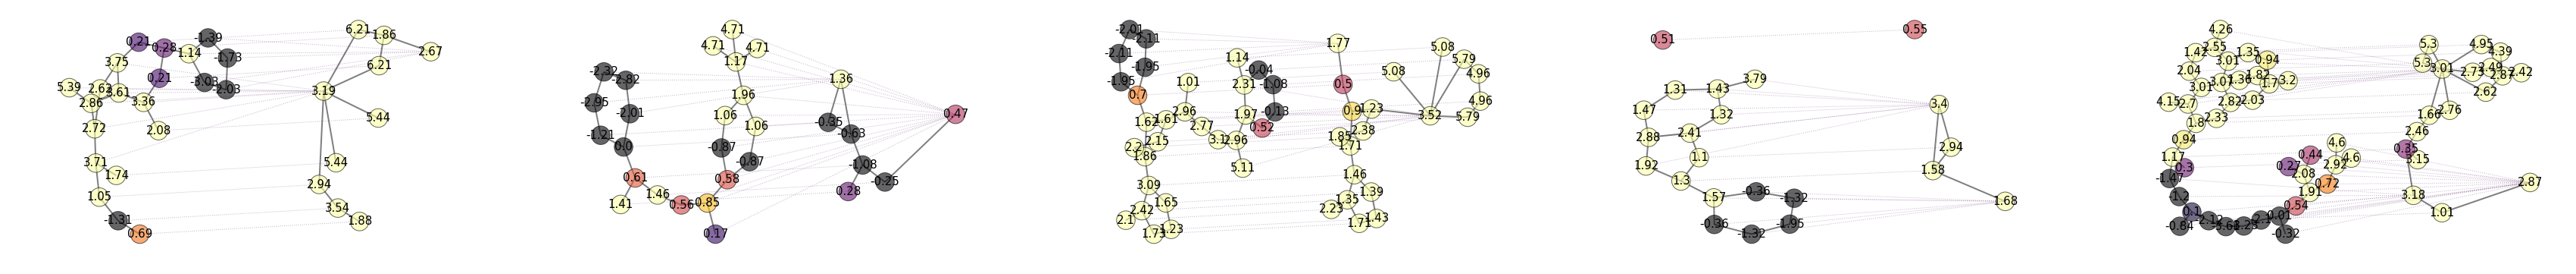

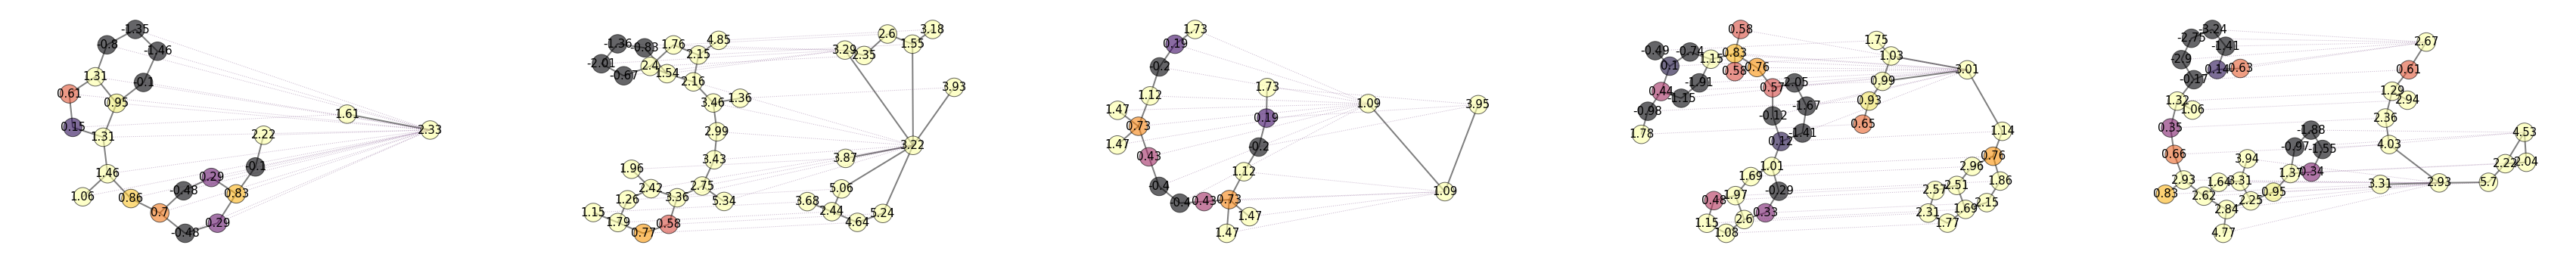

#instances: 80  #interfaces: 75   #cores: 69   #core-interface-pairs: 275
interface id: 579404 [22 options]


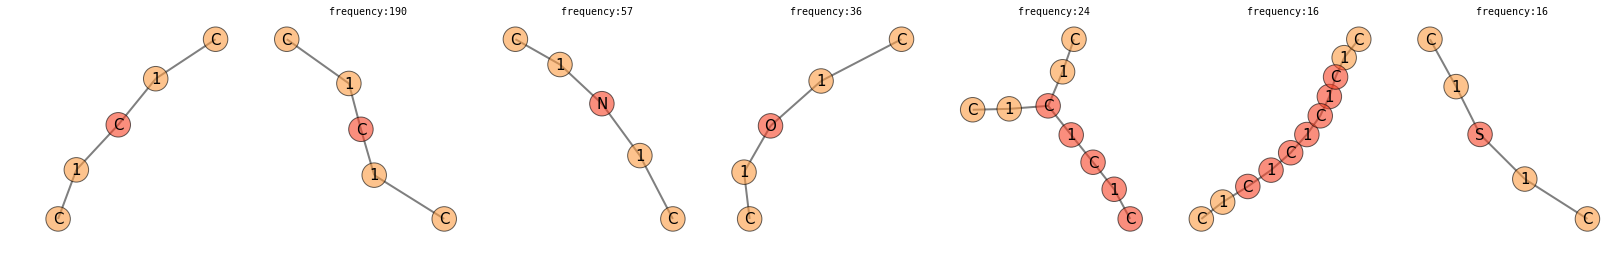

interface id: 328972 [15 options]


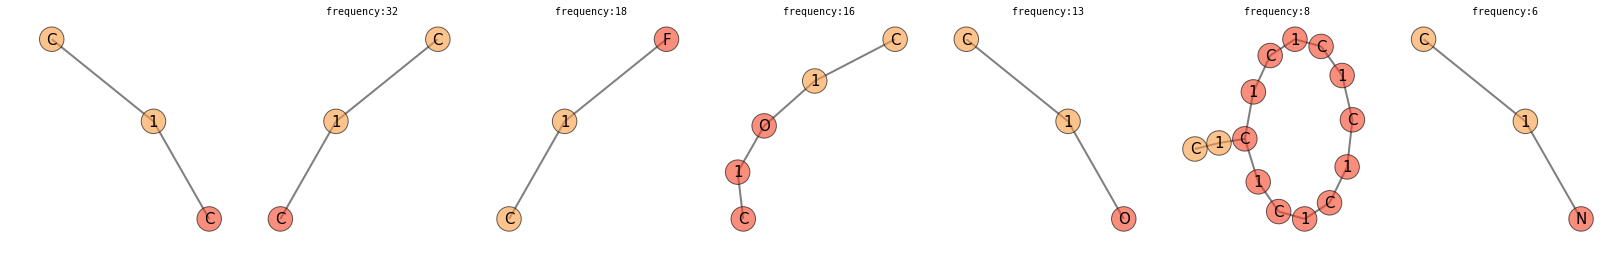

interface id: 95008 [15 options]


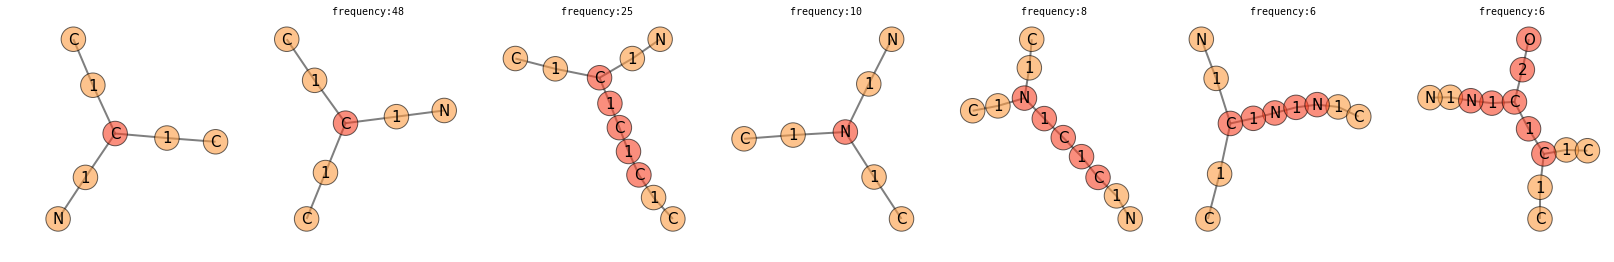

interface id: 40940 [14 options]


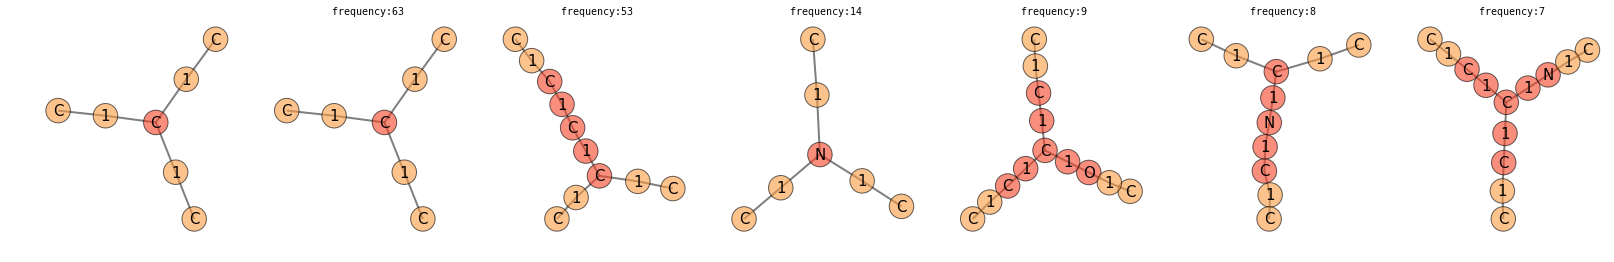

interface id: 8400 [9 options]


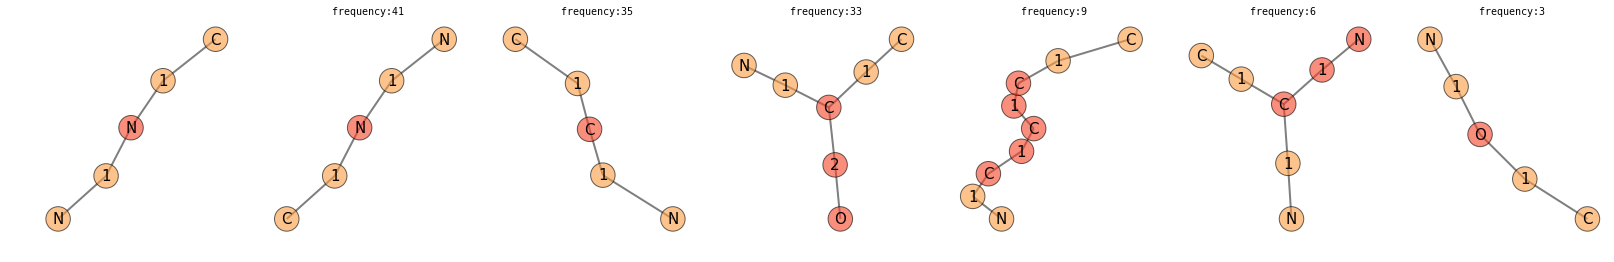

In [3]:
from moleLearnedLayer import  util

params = {'core_choice_byfrequency': True,
 'grammar_options': {'min_cip_count': 2,
                     'min_interface_count': 2,
                     'radius_list': [0, 1],
                     'thickness_list':  [1, 2]},
 'improving_linear_start_fraction': 0.22181197678370146,
 'improving_threshold_fraction': 0.4834929567749625,
 'learn_params': {'depth': 2,
                  'group_score_threshold': -.2,
                  'max_group_size': 8,
                  'min_group_size': 2},
 'n_steps': 21,
 'quick_skip_orig_cip': False}

aid='1834'
size=40 


params['learn_params']['debug']=True



graphs = util.quickfit(aid,size,params)

# 3.1  Layer Comparison

Reading from file: PUBCHEM/AID1834_active.sdf
Reading from file: PUBCHEM/AID1834_inactive.sdf
running parallel, jobnum: 12
Reading from file: PUBCHEM/AID1834_active.sdf
Reading from file: PUBCHEM/AID1834_inactive.sdf


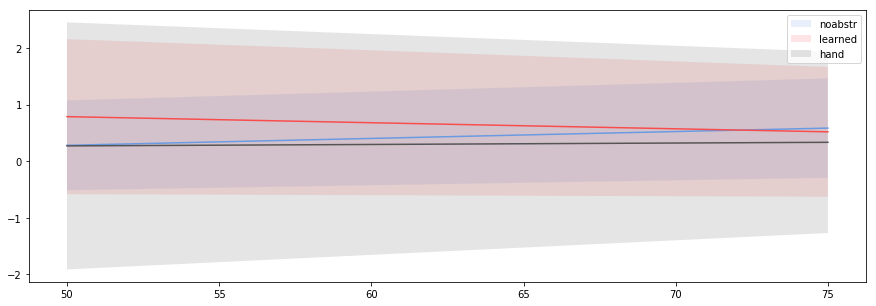

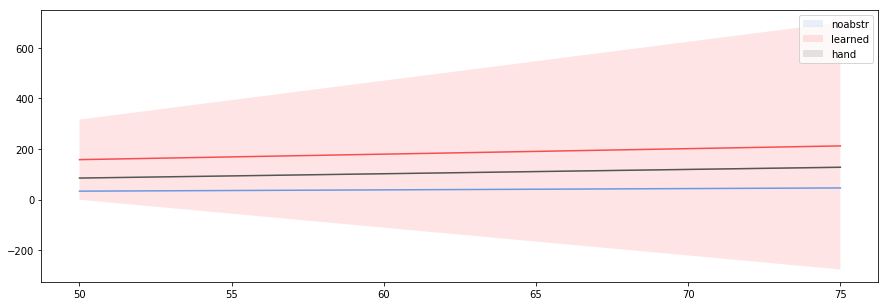

In [4]:
from moleLearnedLayer import layercomparison as lc
aid='1834'
sizes=[50,75]
repeats=2
lc.make_task_file(aid,sizes,repeats,params=[{},{},{}])


fname='%s_%d' % (aid,max(sizes))
tasknum=len(sizes)*repeats*3
print 'running parallel, jobnum:', tasknum
!echo seq 1 $tasknum \| parallel python ../moleLearnedLayer/layercomparison.py $fname | fish  

lc.evalandshow(aid,fname,tasknum,show=True)




# 3.2 Learned Layer vs NaturalLearningCurve

### seeds vs generated instances, histogram 

taskfile: 1834_75
aid: 1834
Reading from file: PUBCHEM/AID1834_active.sdf
Reading from file: PUBCHEM/AID1834_inactive.sdf
size: 50   repeat: 0


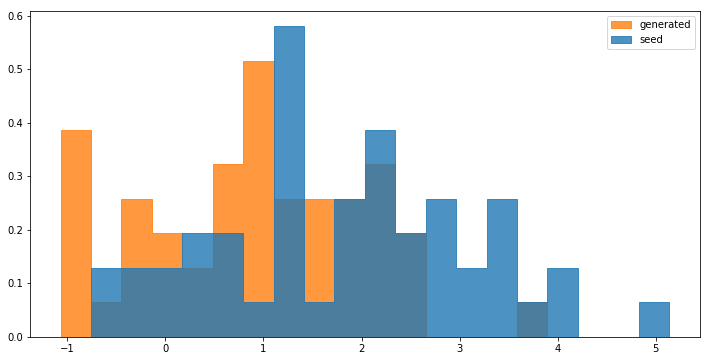

size: 50   repeat: 1


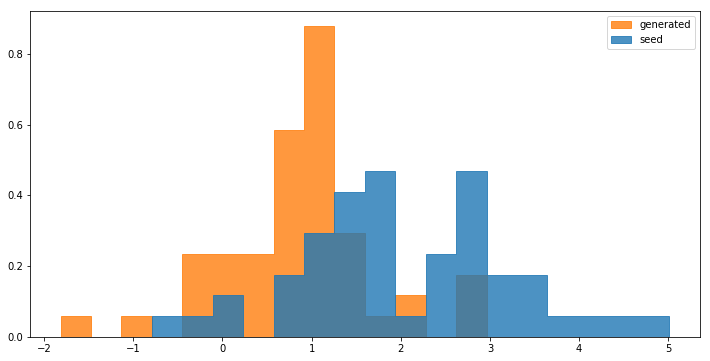

size: 75   repeat: 0


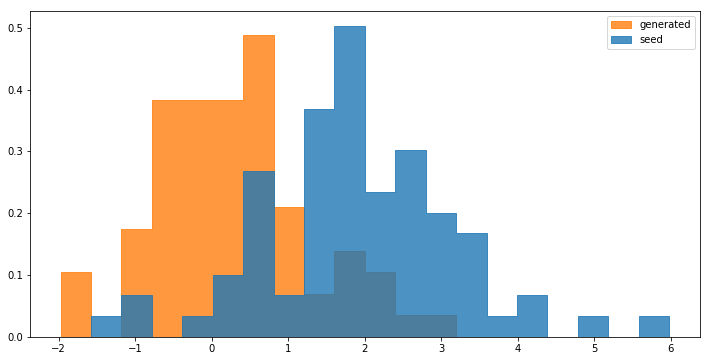

size: 75   repeat: 1


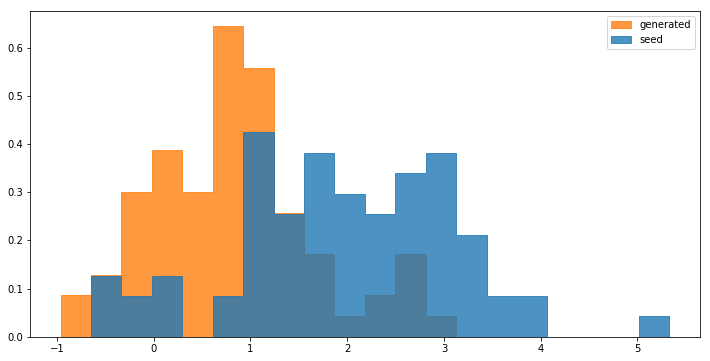

In [5]:
from copy import deepcopy
from moleLearnedLayer import  naturallearning as nl 
# fname and aid  from previous cell 
print "taskfile:",fname
print "aid:",aid
nl.comparisondata_to_histo(fname,aid)


### learning curve with generated instances

/home/smautner/GRAPHLEARN/LearnedLayer/moleLearnedLayer/naturallearning.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  return(  a+b/(x**c)  )


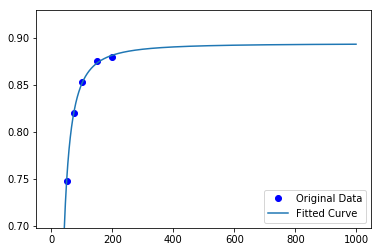

In [1]:
# this cell only works one per kernel-restart..
from moleLearnedLayer import  naturallearning as nl 
assay_id="651610"
train_sizes=[50, 75, 100, 150 ,200]


inversefunc = nl.crossval_to_inversefunc(assay_id,train_sizes)


In [2]:
from moleLearnedLayer import  naturallearning as nl 
select=[1]
repeats=2
test=500
fffname=nl.make_task_file2(assay_id,sizes=train_sizes,test=test,repeats=repeats,selectsamplers=[1]) # test with small aid


tasknum=len(train_sizes)*repeats*len(select)*2
!echo seq 1 $tasknum \| parallel -j 8 python ../moleLearnedLayer/naturallearning.py $fffname | fish 
res = nl.eva("1834", fffname, tasknum/2)

for e in res:
    print "given %d graphs i am as powerful as %.3f graphs" % (e[0], inversefunc(e[1]))   

/home/smautner/GRAPHLEARN/LearnedLayer/moleLearnedLayer/naturallearning.py:98: RuntimeWarning: invalid value encountered in power
  return np.power(b/(y-a),1.0/c)


TypeError: %d format: a number is required, not numpy.float64